# Classification of Dogs and Cats Using Neural Network

In [3]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Data Processing

In [4]:
DATADIR = "C:/Users/vmcr2/Desktop/TRANSFORMERS/CNN/kagglecatsanddogs_5340/PetImages"
CATEGORIES = ["Dog","Cat"]

Using os.path, data is grabbed from the dataset and converted into grayscale images as colour is not the deciding factor in deciding whether an animal is a cat or dog. The animal images are also classified with a 1 or 0 based on whether they are a cat or dog to save for testing purposes. An array of the images and their respective classification is kept as training data. 

In [8]:
training_data = []
IMG_SIZE = 50

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        classification = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,image), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([resized, classification]) 
            except:
                pass



In [9]:
create_training_data()

In [7]:
print(len(training_data))

24946


Data is shuffled to prevent the neural network from simply guessing dog or cat consecutively instead of finding patterns

In [10]:
import random
random.shuffle(training_data)

## Image Pre-Processing and Test Data Selection

The images and their respective classification are stored in seperate numpy arrays with each image being reshaped into a 50x50 image size with 1 representing a gray scale image instead of 3 for RGB. 

In [11]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

X2=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y2=np.array(y)
X2=X2/255

## Model Building

This network is based of a sequential model and consists of a variable amount of Conv2D layers, Dense layers and layer sizes, all of which are tested using TensorBoard. The model is also flattened to 1D as it is 3D before the activation layer which provides the output. 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import time
from tensorflow.keras.callbacks import TensorBoard

dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            tensorboard = TensorBoard(log_dir='logs/{}-conv-{}-nodes-{}-dense-{}'.format(conv_layer,layer_size,dense_layer,int(time.time())))
            
            model = Sequential()
            model.add(Conv2D(layer_size, (3,3), input_shape = X2.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for i in range(conv_layer -1): 
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))


            model.add(Flatten())

            for j in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy'])



            model.fit(X2,y2, batch_size=32,epochs =3, validation_split=0.1,callbacks=[tensorboard])

Epoch 1/3
702/702 [==============================] - 18s 25ms/step - loss: 0.6241 - accuracy: 0.6494 - val_loss: 0.5811 - val_accuracy: 0.7046
Epoch 2/3
702/702 [==============================] - 16s 23ms/step - loss: 0.5540 - accuracy: 0.7200 - val_loss: 0.5618 - val_accuracy: 0.7230
Epoch 3/3
702/702 [==============================] - 16s 23ms/step - loss: 0.5229 - accuracy: 0.7450 - val_loss: 0.5932 - val_accuracy: 0.6978
Epoch 1/3
702/702 [==============================] - 39s 55ms/step - loss: 0.6274 - accuracy: 0.6373 - val_loss: 0.5863 - val_accuracy: 0.6934
Epoch 2/3
702/702 [==============================] - 38s 53ms/step - loss: 0.5271 - accuracy: 0.7387 - val_loss: 0.5269 - val_accuracy: 0.7487
Epoch 3/3
702/702 [==============================] - 38s 54ms/step - loss: 0.4898 - accuracy: 0.7639 - val_loss: 0.5000 - val_accuracy: 0.7643
Epoch 1/3
702/702 [==============================] - 43s 60ms/step - loss: 0.6473 - accuracy: 0.6175 - val_loss: 0.6055 - val_accuracy: 0.6794

Epoch 1/3
702/702 [==============================] - 40s 56ms/step - loss: 0.5972 - accuracy: 0.6715 - val_loss: 0.5352 - val_accuracy: 0.7315
Epoch 2/3
702/702 [==============================] - 38s 54ms/step - loss: 0.5024 - accuracy: 0.7555 - val_loss: 0.5006 - val_accuracy: 0.7619
Epoch 3/3
702/702 [==============================] - 44s 63ms/step - loss: 0.4629 - accuracy: 0.7794 - val_loss: 0.4837 - val_accuracy: 0.7667
Epoch 1/3
702/702 [==============================] - 53s 74ms/step - loss: 0.6494 - accuracy: 0.6038 - val_loss: 0.5824 - val_accuracy: 0.6850
Epoch 2/3
702/702 [==============================] - 40s 57ms/step - loss: 0.5241 - accuracy: 0.7402 - val_loss: 0.5046 - val_accuracy: 0.7495
Epoch 3/3
702/702 [==============================] - 40s 57ms/step - loss: 0.4672 - accuracy: 0.7785 - val_loss: 0.5176 - val_accuracy: 0.7419
Epoch 1/3
702/702 [==============================] - 42s 59ms/step - loss: 0.5972 - accuracy: 0.6786 - val_loss: 0.5689 - val_accuracy: 0.7082

Through testing it seems that 3-conv2D layers with a 64 node layer size seems to give the least evaluation loss as well as the highest evaluation accuracy. In terms of the dense layers, 0 and 2 dense layers seemed to work best but when comparing their epoch accuracy the model with 2 dense layers seemed more accurate. 

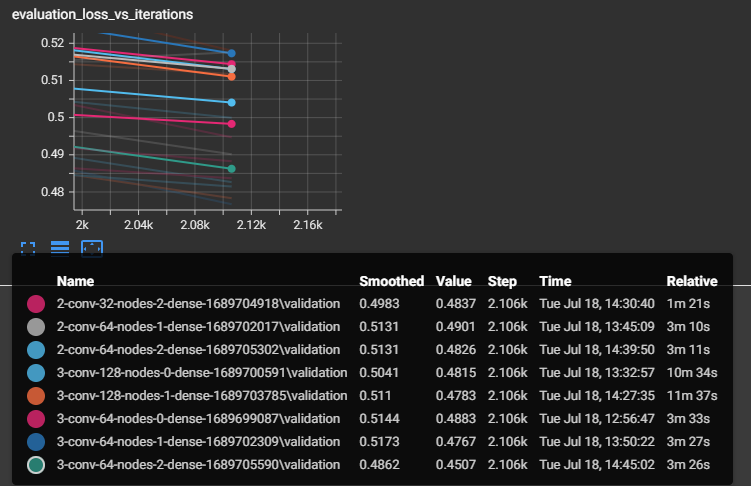 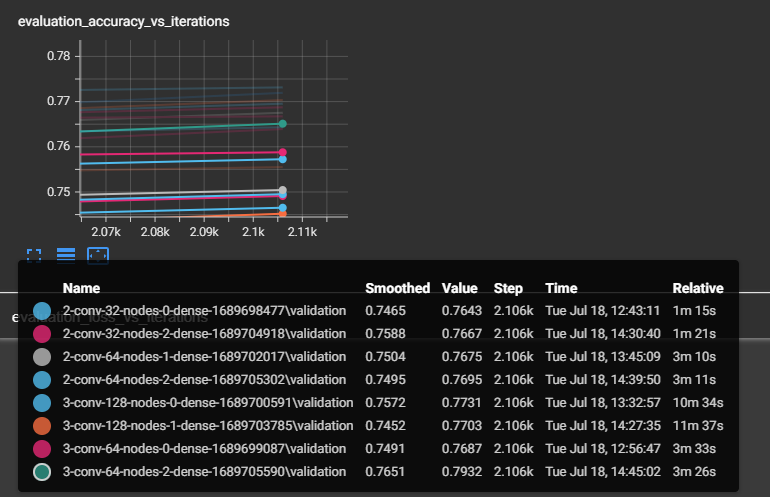 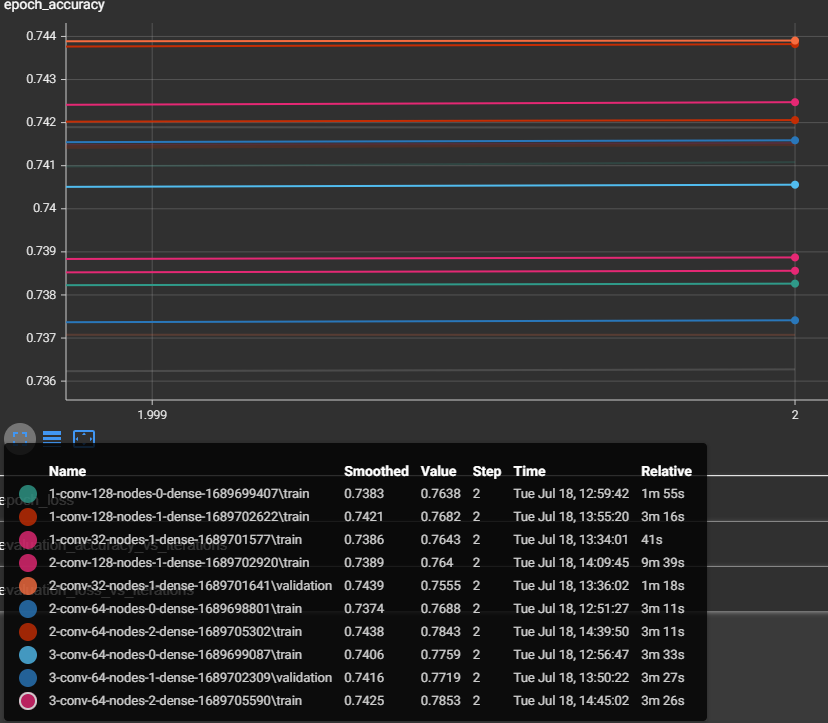



## Saving Model

A model with 3 conv layers, 2 dense layers and 64 node layer size was chosen because of its high accuracy and minimal loss compared to the other models. This model is then saved to use for future predictions.  

In [14]:
dense_layers = [2]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            tensorboard = TensorBoard(log_dir='logs/{}-conv-{}-nodes-{}-dense-{}'.format(conv_layer,layer_size,dense_layer,int(time.time())))
            

            model = Sequential()
            model.add(Conv2D(layer_size, (3,3), input_shape = X2.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for i in range(conv_layer -1): 
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))


            model.add(Flatten())

            for j in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy'])

model.save('3-conv-2-Dense-x64')

INFO:tensorflow:Assets written to: 3-conv-2-Dense-x64\assets
